<a href="https://colab.research.google.com/github/amanchanagaraju/Brain-Tumor-Detection/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Get data

In [ ]:
import requests
import zipfile
from pathlib import Path
#setup pathlib import Path
data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"
#if the image folder does'nt exixst download it and prepare it
if image_path.is_dir():
  print(f"{image_path} directory alreay exits....sking download")
else:
  print(f"{image_path} does not exits,creating one....")
  image_path.mkdir(parents=True,exist_ok=True)
#download pizza,steak and sushi data
with open(data_path/"pizza_steak_sushi.zip","wb") as f:

  request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("downloading pizzza ,steak ,sushi")
  f.write(request.content)
#unzip the file
with zipfile.ZipFile(data_path /"pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza,steak and sushi data...")
  zip_ref.extractall(image_path)



data/pizza_steak_sushi does not exits,creating one....
downloading pizzza ,steak ,sushi
Unzipping pizza,steak and sushi data...


##2.Becoming one with data (data preparation and data exploation)


In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)}images ")
    print(dirpath)
    print(dirnames)

In [ ]:
walk_through_dir(image_path)


There are 2 directories and 0images 
data/pizza_steak_sushi
['train', 'test']
There are 3 directories and 0images 
data/pizza_steak_sushi/train
['steak', 'sushi', 'pizza']
There are 0 directories and 75images 
data/pizza_steak_sushi/train/steak
[]
There are 0 directories and 72images 
data/pizza_steak_sushi/train/sushi
[]
There are 0 directories and 78images 
data/pizza_steak_sushi/train/pizza
[]
There are 3 directories and 0images 
data/pizza_steak_sushi/test
['steak', 'sushi', 'pizza']
There are 0 directories and 19images 
data/pizza_steak_sushi/test/steak
[]
There are 0 directories and 31images 
data/pizza_steak_sushi/test/sushi
[]
There are 0 directories and 25images 
data/pizza_steak_sushi/test/pizza
[]


In [ ]:
#setup train and testing paths
train_dir=image_path/"train"
test_dir=image_path/"test"
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

#2.1 visualizing and image

1.Get all of the image paths

2.pick a random image path using python's random.choice()

3.Get the image class name using pathlib.Path.parent.stem

4.https://github.com/python-pillow/Pillow

In [ ]:
import random
from PIL import Image
#set seed
random.seed(42)
image_path_list=list(image_path.glob("*/*/*.jpg"))


In [ ]:
#2.pick a random image paths
random_image_path=random.choice(image_path_list)
#3.get  image class frompath name(the image class is in the name of the directory whresthe data is stored)
image_class=random_image_path.parent.stem
print(image_class)

steak


random image path:data/pizza_steak_sushi/train/steak/176508.jpg
Image dimensions512,384


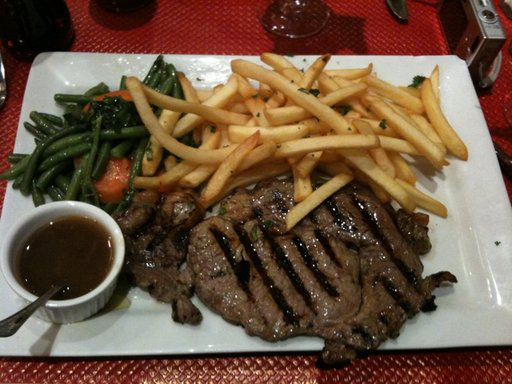

In [ ]:
#4.Open image
img=Image.open(random_image_path)
print(f"random image path:{random_image_path}")
print(f"Image dimensions{img.width},{img.height}")
img

(-0.5, 511.5, 383.5, -0.5)

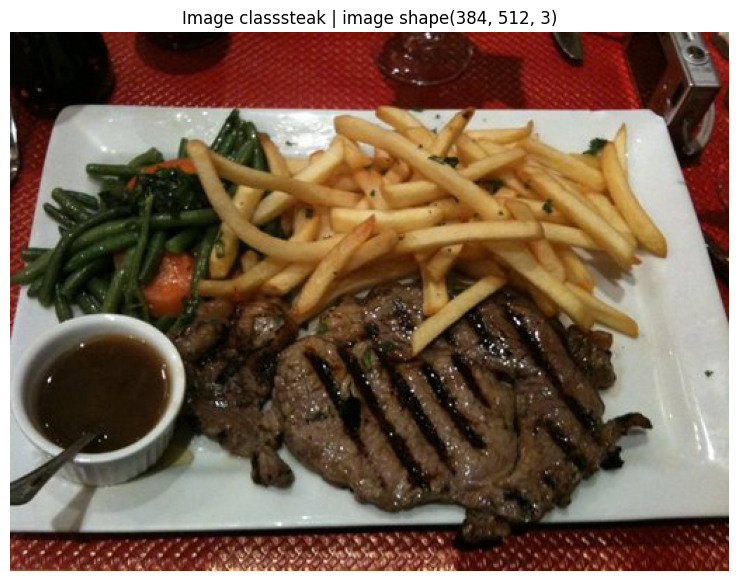

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Turn the image into an array
img_as_array=np.array(img)
#plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class{image_class} | image shape{img_as_array.shape}")
plt.axis(False)

In [ ]:
img_as_array

array([[[  9,   5,   2],
        [  6,   2,   0],
        [  5,   1,   0],
        ...,
        [156, 156, 128],
        [145, 145, 119],
        [152, 152, 128]],

       [[  9,   5,   2],
        [  8,   4,   1],
        [  8,   4,   1],
        ...,
        [148, 144, 117],
        [140, 136, 111],
        [150, 144, 122]],

       [[  8,   4,   1],
        [ 10,   6,   3],
        [ 10,   6,   3],
        ...,
        [141, 131, 106],
        [142, 129, 110],
        [151, 135, 119]],

       ...,

       [[112,  42,  32],
        [ 95,  25,  17],
        [108,  40,  31],
        ...,
        [126,  59,  43],
        [130,  63,  46],
        [105,  38,  21]],

       [[135,  65,  57],
        [116,  48,  39],
        [122,  55,  46],
        ...,
        [ 95,  28,  11],
        [ 99,  32,  15],
        [ 93,  26,   9]],

       [[154,  86,  77],
        [155,  88,  79],
        [142,  78,  69],
        ...,
        [ 89,  24,   6],
        [ 70,   5,   0],
        [ 90,  25,   7]]

##3. transforming data into tensors

and also into "torch.utils.data.Dataset'and "torch.utils.data.Dataloader"

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms


In [ ]:
data_transform=transforms.Compose([
    #resize image
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    #turn into torch tensor
    transforms.ToTensor()])

In [ ]:
data_transform(img)

tensor([[[0.4275, 0.3451, 0.4353,  ..., 0.0196, 0.0275, 0.0392],
         [0.2392, 0.3569, 0.4078,  ..., 0.0118, 0.0275, 0.0314],
         [0.2980, 0.4588, 0.2824,  ..., 0.0157, 0.0314, 0.0275],
         ...,
         [0.4000, 0.3882, 0.3647,  ..., 0.4157, 0.4549, 0.4471],
         [0.4000, 0.4118, 0.3882,  ..., 0.4314, 0.4588, 0.4863],
         [0.4196, 0.3882, 0.3608,  ..., 0.4745, 0.4745, 0.4863]],

        [[0.3333, 0.1255, 0.2824,  ..., 0.0275, 0.0235, 0.0235],
         [0.1412, 0.1216, 0.3216,  ..., 0.0196, 0.0275, 0.0157],
         [0.1020, 0.1843, 0.2275,  ..., 0.0196, 0.0275, 0.0196],
         ...,
         [0.1373, 0.1294, 0.1059,  ..., 0.1569, 0.1961, 0.1765],
         [0.1176, 0.1373, 0.1098,  ..., 0.1725, 0.1922, 0.2157],
         [0.1529, 0.1216, 0.0980,  ..., 0.2118, 0.2039, 0.2235]],

        [[0.2706, 0.0824, 0.2627,  ..., 0.0078, 0.0078, 0.0118],
         [0.0902, 0.0902, 0.3020,  ..., 0.0039, 0.0118, 0.0078],
         [0.0588, 0.1647, 0.2000,  ..., 0.0039, 0.0118, 0.

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

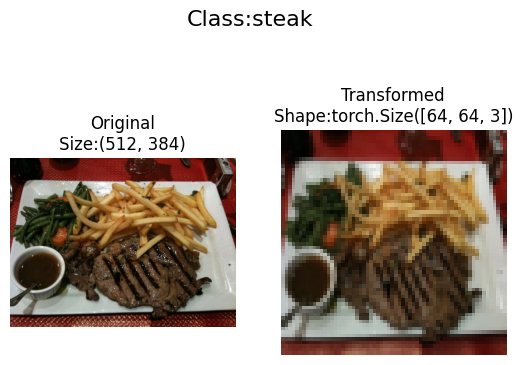

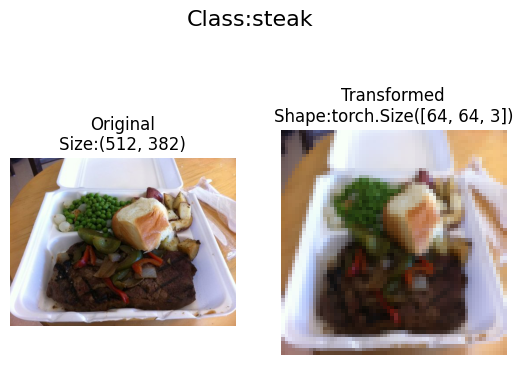

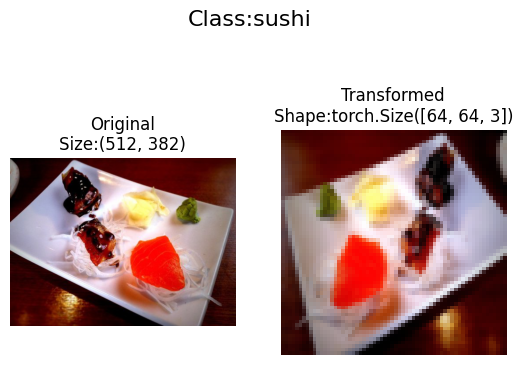

In [ ]:
def plot_transformed_images(image_paths,transform,n=3,seed=42):
  """
  selectts random images from a path of images and loads/transforms
  them then plots the original vs the transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths=random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax=plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{f.size}")
      ax[0].axis(False)
      #Transform and plot target image
      transformed_image=transform(f).permute(1,2,0)#note we will need to change
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape:{transformed_image.shape}")
      ax[1].axis("off")
      fig.suptitle(f"Class:{image_path.parent.stem}",fontsize=16)
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

# 4. loading image data using "image floderm"

In [ ]:
#use ImageFloder to create dataset(s)
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)
test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
#Get class name as list
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lenghts of our dataset
len(train_data),len(test_data)

(225, 75)

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
# Index on train_data Dataset to get a single image and label
img,label=train_data[0][0],train_data[0][1]
class_names[label]

'pizza'

In [ ]:
print(f"Image tensor\n{img}")

Image tensor
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.090

Orginal shape:torch.Size([3, 64, 64])
permute imagetorch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

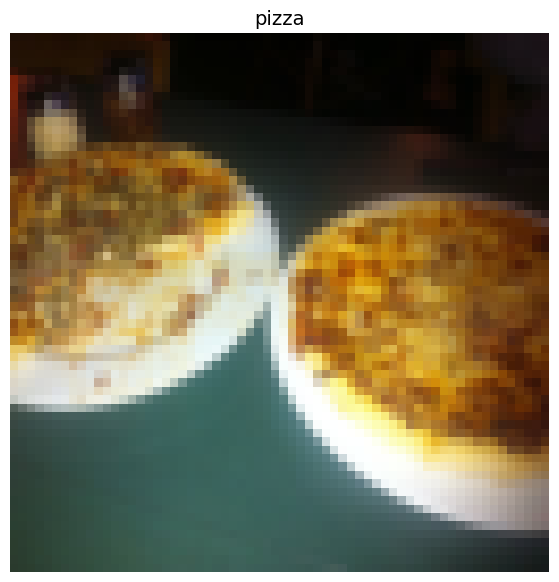

In [ ]:
#Rearrage the order of dimensions
img_permute=img.permute(1,2,0)
#Prrint out different shaapes
print(f"Orginal shape:{img.shape}")
print(f"permute image{img_permute.shape}")
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=14)

##4.1 turn loaded images into "Dataloader"'s

A dataloader help us turn our  "dataset s" into iterable and we can customize the batch_size
so our model can see batch_size images at atime

In [ ]:
import os
os.cpu_count()

2

In [ ]:
# Turn train and datasets into data loader
from torch.utils.data import DataLoader

train_dataloader=DataLoader(dataset=train_data,
                             batch_size=32,
                             num_workers=2,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                             batch_size=32,
                             num_workers=2,
                            shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fa2511fcd60>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa2511fdb10>)

In [ ]:
len(train_dataloader)

8

In [ ]:
img,label=next(iter(train_dataloader))
print(f"Image shape:{img.shape}")
print(f"Label shape:{label.shape}")

Image shape:torch.Size([32, 3, 64, 64])
Label shape:torch.Size([32])


from torch._C import FunctionSchema
import threading
# 5.Option 2:Loading Tmage data with a custom "Dataset"

1.want to be able to load images from file

2.want to be able to get class names from datasets

3.want to able to get classes as dictionary from Dataset

pros:

* can create a"dataset" out of almost anything

* not limited to Pytorch pre-built "Dataset" FunctionSchema

cons

* Even though you could create "dataset "out of almost anything,it doesn't mean it will work

* using custom "dataset "often results write may more code

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List


In [ ]:
#Instance of torchvision.datasets.ImageFolder()
train_data.classes,train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# 5.1 CREAte a helper functions to get class names

We want a function to:
1.Get the class names using 'os.scandir()' to traverse a target directory (idelly
                                                                           the diectory is in standard image classification)



In [ ]:
#Setup path for target directory
target_directory=train_dir
print(f"Tardget dir:{target_directory}")
#Get the class names from the target directory
class_names_found=sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Tardget dir:data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(target_directory))

[<DirEntry 'steak'>, <DirEntry 'sushi'>, <DirEntry 'pizza'>]

In [ ]:
def find_classes(directory:str)->Tuple[List[str],Dict[str,int]]:
  """finds the class floder names in target directory."""
  # 1. Get the class names by scanning the target directory
  classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  #2.Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}....please checkk file structure")
  #3.Create a dictory of index labels(computers prefer number rather than strings as labels)
  class_to_idx={class_name:i for i,class_name in enumerate(classes)}
  return classes,class_to_idx


In [ ]:
find_classes(target_directory)


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# 5.2 Create a custom "Dataset" to replicate "imagefolder"

To create our own custom dataset, we want to:

1.subclass "torch.utils.data.Dataset"

2.Init our subclass withh a target directory (the directory we'xdx like to get data from)as well as atransform if we'd like to transform our data.

3.Create several attributes
* paths-image path
* transform
* classes-a lisyt of target classes
* class_to_idx-adict of target integers

4.Create a function to "load_images"

5.overwrite__len()__ and ___get()__



In [ ]:
from torch.utils.data import Dataset
#1
class ImageFolderCustom(Dataset):
  #2
  def __init__(self,targ_dir:str,
               transform=None):
    #3
    #get image paths
    self.paths=list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    #setup transforms
    self.transform=transform
    #create classes and class_to_idx attributes
    self.classes,self.class_to_idx=find_classes(targ_dir)
    #4.
    def load_image(self,index:int)->Image.Image:
      "Opens an image via a path and returns it."
      image_path=self.paths[index]
      return Image.open(image_path)
    # 5. Overwrite __len__()
    def __len__(self)->int:
      #return total no of samples
      return len(self.paths)
    # 6. Overwrite __getitem__()method to return aparticular sample
    def __getitem__(self,index:int)->Tuple[torch.Tensor,int]:
      img=self.load_image(index)
      class_name=self.paths[index].parent.name
      class_idx=self.class_to_idx[class_name]
    # transform if neccessary
    if self.transform:
      return self.transform(img),class_idx
    else:
      return img,class_idx



In [ ]:
from torchvision import  transforms
train_transforms=transforms.Compose([transforms.ToPILImage(),
                                     flatten(),
                                    transforms.Resize(size=(64,64)),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor()])
test_transforms=transforms.Compose([
                                    transforms.Resize(size=(64,64)),

                                    transforms.ToTensor()])

NameError: ignored

In [ ]:
train_data_custom=ImageFolderCustom(targ_dir=train_dir,
                                    transform=train_transforms)
test_data_custom=ImageFolderCustom(targ_dir=train_dir,
                                    transform=test_transforms)